# Laporan Proyek Machine Learning - Dwi NurCahyo Purbonegoro
### Proyek machine learning ini berfokus pada bidang Bisnis Penjualan/Otomotif, dengan judul Proyek Pertama : Prediksi Harga Mobil
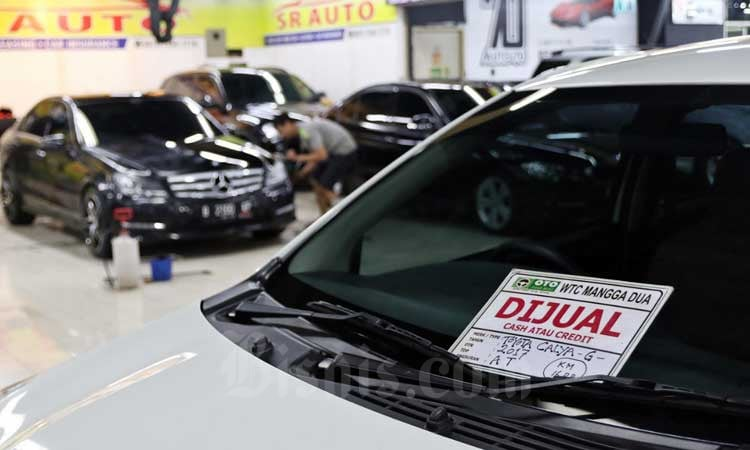
### Latar Belakang
Harga mobil bekas sangat bervariasi tergantung berbagai faktor seperti merek, tahun produksi, jenis bahan bakar, jarak tempuh, dan kondisi kendaraan. Bagi penjual maupun pembeli, mengetahui estimasi harga yang wajar sangatlah penting untuk pengambilan keputusan yang bijak dan adil.

Dalam dunia digital saat ini, tersedia banyak data kendaraan yang dapat dimanfaatkan untuk membangun sistem prediksi harga berbasis machine learning. Sistem ini dapat membantu:

- Penjual menetapkan harga jual yang kompetitif
- Pembeli menentukan kewajaran harga suatu kendaraan
- Platform jual-beli mobil memberikan estimasi harga secara otomatis

Dengan membangun model prediktif menggunakan pendekatan machine learning, kita dapat menghasilkan estimasi harga mobil yang akurat, konsisten, dan berbasis data.

## 1. IMPORT LIBRARY

In [1]:
# Import library
import pandas as pd # Untuk manipulasi data (membaca CSV, dataframe)
import numpy as np # Untuk operasi numerik (array, matematika, dll)
import matplotlib.pyplot as plt # Untuk membuat grafik (visualisasi)
import seaborn as sns # Untuk visualisasi data statistik (heatmap, scatterplot, dll)

# scikit-learn - Data Splitting, Scaling, Preprocessing, Modeling, dan Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# scikit-learn & XGBoost - Algoritma Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Warnings Handling (Untuk menyembunyikan peringatan yang tidak penting)
import warnings
warnings.filterwarnings('ignore')

## 2. DATA UNDERSTANDING
Data Understanding atau pemahaman data merupakan tahap untuk mengerti isi dari data yang dimiliki serta menilai sejauh mana kualitas data tersebut dapat mendukung proses analisis

Sumber Dataset : https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge

Dataset yang digunakan merupakan data kendaraan dengan fitur-fitur terkait spesifikasi dan kondisi mobil.

Dataset memiliki kolom sebagai berikut:

| Fitur                | Deskripsi                                                      |
| -------------------- | -------------------------------------------------------------- |
| `ID`                 | ID unik mobil                                                  |
| `Price`              | Harga mobil dalam satuan tertentu (target/label)               |
| `Levy`               | Pajak kendaraan                                                |
| `Manufacturer`       | Merek mobil                                                    |
| `Model`              | Model mobil                                                    |
| `Prod. year`         | Tahun produksi                                                 |
| `Category`           | Jenis kendaraan (SUV, Sedan, dll.)                             |
| `Leather interior`   | Apakah memiliki interior kulit (Yes/No)                        |
| `Fuel type`          | Jenis bahan bakar (Petrol, Diesel, Hybrid, dll.)               |
| `Engine volume`      | Kapasitas mesin (L)                                            |
| `Mileage`            | Jarak tempuh kendaraan (kilometer)                             |
| `Cylinders`          | Jumlah silinder mesin                                          |
| `Gear box type`      | Jenis transmisi (Manual/Automatic)                             |
| `Drive wheels`       | Tipe penggerak roda (FWD, RWD, AWD)                            |
| `Doors`              | Jumlah pintu                                                   |
| `Wheel`              | Setir kiri/kanan                                               |
| `Color`              | Warna mobil                                                    |
| `Airbags`            | Jumlah airbag                                                  |

### Eksplorasi Data Awal

* Fitur-fitur seperti Manufacturer, Model, Category, Leather interior, Fuel type, Gear box type, Drive wheels, Doors, Wheel, dan Color merupakan data kategorikal yang perlu dikodekan (encoding) sebelum digunakan dalam pemodelan.

* Kolom numerik seperti Price, Prod. year, Cylinders, dan Airbags memiliki rentang nilai yang berbeda-beda, sehingga perlu dilakukan normalisasi atau scaling untuk meningkatkan kinerja algoritma machine learning.

* Kolom Levy bertipe object dan mengandung nilai kosong atau simbol (-) yang perlu dibersihkan serta dikonversi ke numerik.

* Kolom Engine volume mengandung kombinasi angka dan teks (misalnya, '2.0 Turbo') yang perlu dipisahkan dan dibersihkan sebelum digunakan.

* Nilai pada kolom Mileage masih mengandung satuan seperti "km", sehingga perlu dibersihkan dan diubah ke format numerik.

* Kolom Doors mengandung nilai yang tidak konsisten seperti '04-May', sehingga perlu diproses untuk mendapatkan jumlah pintu yang valid.

* Distribusi nilai pada fitur Price menunjukkan skewness (kemiringan), sehingga transformasi logaritmik dapat dipertimbangkan untuk menstabilkan variansi dan mendekatkan distribusi ke normal.

## 2.1 LOAD DATASET

In [2]:
from google.colab import files

# Unggah file kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# Download dari Kaggle
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d deepcontractor/car-price-prediction-challenge
!unzip -o car-price-prediction-challenge.zip -d data

Dataset URL: https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge
License(s): CC0-1.0
  0% 0.00/429k [00:00<?, ?B/s]
100% 429k/429k [00:00<00:00, 782MB/s]
Archive:  car-price-prediction-challenge.zip
  inflating: data/car_price_prediction.csv  


In [4]:
# Load dataset
df = pd.read_csv("/content/data/car_price_prediction.csv")

In [5]:
# check Missing value
df.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


Tidak ada missing value

In [6]:
# Check Duplication
df.duplicated().sum()

np.int64(313)

Terdapat data yang terduplikasi sebanyak 313

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Semua kolom memiliki jumlah data yang sesuai yaitu 19237 dan bertipe object, integer, dan float

In [8]:
# Check the number of unique values of each column
df.nunique()

,0
ID,18924
Price,2315
Levy,559
Manufacturer,65
Model,1590
Prod. year,54
Category,11
Leather interior,2
Fuel type,7
Engine volume,107


In [9]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### 📊 **Insights from Statistics**

#### 🚗 Variasi Mobil

Dataset mencakup **65 produsen** dan **1.590 model mobil** yang berbeda, menunjukkan keragaman tinggi dalam jenis kendaraan. Atribut seperti **kategori**, **transmisi**, dan **tipe penggerak** bervariasi secara signifikan. Contoh kategori populer termasuk *Sedan*, *Jeep*, dan *Hatchback*.

#### 💰 Kisaran Harga

* **Harga Minimum**: \$1
* **Harga Maksimum**: \$26.307.500
* **Harga Rata-rata**: Sekitar **\$18.555**
  Distribusi harga bersifat **skewed**, menunjukkan sebagian mobil dengan harga sangat tinggi yang mempengaruhi nilai rata-rata.

#### 🛠️ Keragaman Mesin

Fitur `Engine volume` mencakup **lebih dari 100 variasi**, seringkali disertai label tambahan seperti *Turbo*.
Jumlah `Cylinders` bervariasi antara **1 hingga 16**, dengan mayoritas mobil memiliki **4 silinder**.

#### 📉 Distribusi dan Outlier

* Kolom seperti `Mileage` (jarak tempuh) memiliki variasi besar, mulai dari **0 km** hingga ratusan ribu kilometer.
* Fitur `Levy` mengandung banyak nilai kosong atau `'-'`, sehingga perlu penanganan khusus sebelum analisis.
* Nilai pada `Airbags` berkisar antara **0 hingga 16**, dengan rata-rata sekitar **6 buah**.
* Potensi outlier ditemukan pada `Price`, `Mileage`, dan `Engine volume` yang perlu diwaspadai dalam analisis lebih lanjut.


In [10]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [11]:
categorical_columns = [
    'Manufacturer',
    'Model',
    'Category',
    'Leather interior',
    'Fuel type',
    'Gear box type',
    'Drive wheels',
    'Doors',
    'Wheel',
    'Color'
]

for col in categorical_columns:
    print(f"Category in {col} is : {df[col].unique()}")


Category in Manufacturer is : ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Category in Model is : ['RX 450' 'Equinox' 'FIT' ... 'E 230 124' 'RX 450 F SPORT' 'Prius C aqua']
Category in Category is : ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
Category in Leather interior is : ['Yes' 'No']
Category in Fuel type is : ['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-i

## 3. DATA CLEANING & PREPROCESSING

In [12]:
# Salin dataset agar tidak mengubah data asli
df_cleaned = df.copy()

#### 3.1. Hapus Duplikasi Data

In [13]:
# Hapus baris duplikat
df_cleaned = df.drop_duplicates()

# Periksa jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus duplikasi: {df_cleaned.shape[0]}")

Jumlah data setelah menghapus duplikasi: 18924


#### 3.2. Penanganan Missing Value

In [14]:
# Bersihkan kolom 'Levy': ubah '-' menjadi NaN dan konversi ke float
df_cleaned['Levy'] = df_cleaned['Levy'].replace('-', np.nan).str.replace(',', '').astype(float)

# Isi missing value pada Levy dengan median
df_cleaned['Levy'].fillna(df_cleaned['Levy'].median(), inplace=True)

# Bersihkan Mileage dan ubah ke float
df_cleaned['Mileage'] = df_cleaned['Mileage'].str.replace(' km', '').str.replace(',', '').astype(float)

# Buat fitur Is_Turbo SEBELUM ekstrak Engine volume
df_cleaned['Is_Turbo'] = df_cleaned['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)

# Ekstrak angka Engine volume
df_cleaned['Engine volume'] = df_cleaned['Engine volume'].str.extract(r'([\d.]+)').astype(float)

# Bersihkan Doors
door_map = {'02-Mar': 2, '04-May': 4, '>5': 6}
df_cleaned['Doors'] = df_cleaned['Doors'].map(door_map).fillna(4).astype(int)  # Default ke 4 jika tak dikenal

# Ubah 'Leather interior' ke biner
df_cleaned['Leather interior'] = df_cleaned['Leather interior'].map({'Yes': 1, 'No': 0}).fillna(0)

#### 3.4. Transformasi dan Skala Fitur

In [15]:
# Umur mobil
df_cleaned['Car_Age'] = 2025 - df_cleaned['Prod. year']

# Mileage per Year
df_cleaned['Mileage_per_Year'] = df_cleaned['Mileage'] / df_cleaned['Car_Age']
df_cleaned['Mileage_per_Year'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned['Mileage_per_Year'].fillna(df_cleaned['Mileage_per_Year'].median(), inplace=True)

# Grup usia
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Car_Age'], bins=[0, 3, 10, 100], labels=['New', 'Medium', 'Old'])

# Luxury brand flag
luxury_brands = ['BMW', 'MERCEDES-BENZ', 'LEXUS', 'AUDI', 'PORSCHE', 'TESLA']
df_cleaned['Is_Luxury'] = df_cleaned['Manufacturer'].apply(lambda x: 1 if x in luxury_brands else 0)

# Brand simplifikasi (Top 10 populer)
top_brands = df_cleaned['Manufacturer'].value_counts().nlargest(10).index
df_cleaned['Manufacturer'].apply(lambda x: x if x in top_brands else 'Other')

# Proxy efisiensi bahan bakar
df_cleaned['Fuel_Efficiency_Proxy'] = df_cleaned['Car_Age'] / df_cleaned['Engine volume']
df_cleaned['Fuel_Efficiency_Proxy'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned['Fuel_Efficiency_Proxy'].fillna(df_cleaned['Fuel_Efficiency_Proxy'].median(), inplace=True)

#### 3.3. Encoding Fitur Kategorikal

In [16]:
# Fitur numerik
numerical_features = ['Levy', 'Mileage', 'Engine volume', 'Airbags',
                          'Car_Age', 'Mileage_per_Year', 'Fuel_Efficiency_Proxy']

scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Transformasi target
if 'Price' in df_cleaned.columns:
    df_cleaned['Price'] = np.log1p(df_cleaned['Price'])  # log(1 + x) untuk stabilitas numerik

# One-hot encoding kategori terpilih
categorical_to_encode = ['Manufacturer', 'Fuel type', 'Gear box type',
                             'Drive wheels', 'Wheel', 'Color', 'Age_Group', 'Category', 'Model']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_to_encode, drop_first=True)

#### 3.5. Pembagian Dataset

In [17]:
# Pisahkan fitur dan target
X = df_cleaned.drop(['ID', 'Price'], axis=1)
y = df_cleaned['Price']

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Hapus karakter ilegal dari nama kolom
X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)

# Ukuran akhir dataset
print(f"Training set: {X_train.shape[0]} data poin")
print(f"Testing set: {X_test.shape[0]} data poin")
print(f"Jumlah fitur setelah encoding: {X_train.shape[1]}")


Training set: 17031 data poin
Testing set: 1893 data poin
Jumlah fitur setelah encoding: 1705


## 4. MODELLING

### 4.1. Inisialisasi Model

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost Regressor": XGBRegressor(random_state=42, n_estimators=100, verbosity=0)
}

### 4.2. Latih dan Evaluasi Model

In [19]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# Tampilkan hasil evaluasi
results_df = pd.DataFrame(results).T
print("Hasil Evaluasi Model (target = log(Price))")
print(results_df)

Hasil Evaluasi Model (target = log(Price))
                              MAE      RMSE        R2
Linear Regression        0.946485  1.367330  0.285271
Random Forest Regressor  0.442549  0.893156  0.695035
XGBoost Regressor        0.594116  0.988063  0.626781


### 4.3. Tuning dan Optimasi

In [20]:
# GridSearch Random Forest - ringan
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=2,  # dari 3 jadi 2 untuk efisiensi
    scoring='r2',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("\n===== Best Random Forest via GridSearch =====")
print("R2 Score:", grid_rf.best_score_)
print("Best Params:", grid_rf.best_params_)

# GridSearch XGBoost - ringan
xgb_params = {
    'n_estimators': [200],
    'max_depth': [4, 6],
    'learning_rate': [0.05],
    'subsample': [1.0],
    'colsample_bytree': [0.7]
}

grid_xgb = GridSearchCV(
    XGBRegressor(random_state=42, verbosity=0),
    xgb_params,
    scoring='neg_mean_absolute_error',
    cv=2,  # dari 3 jadi 2
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)

print("\n===== Best XGBoost via GridSearch =====")
print("Best MAE (neg):", grid_xgb.best_score_)
print("Best Params:", grid_xgb.best_params_)



===== Best Random Forest via GridSearch =====
R2 Score: 0.5980599132195071
Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

===== Best XGBoost via GridSearch =====
Best MAE (neg): -0.6735588075620327
Best Params: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}


### 4.4 Feature Importance

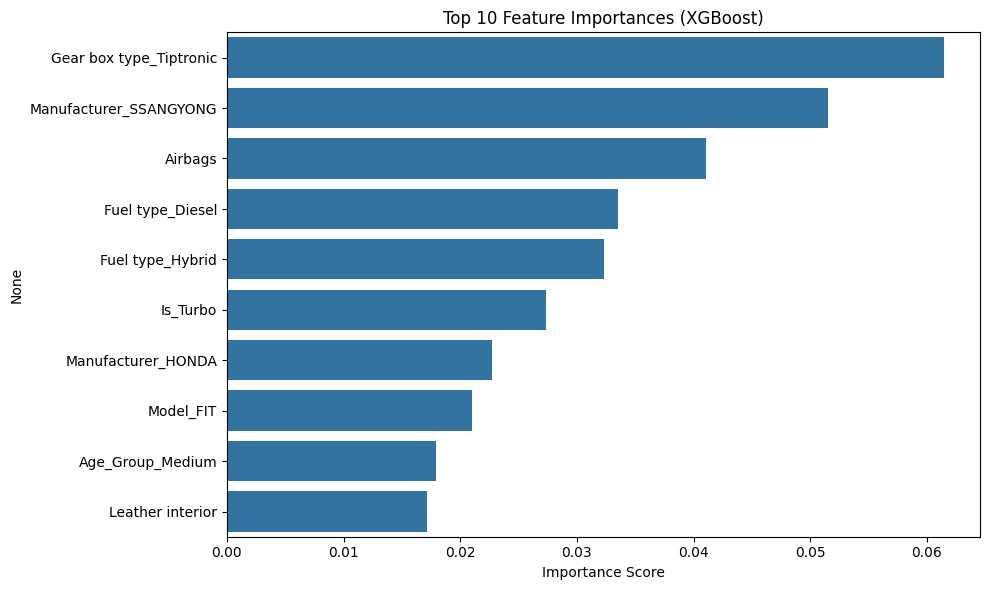

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gunakan model terbaik dari GridSearch XGBoost
final_xgb = grid_xgb.best_estimator_

# Dapatkan fitur penting
importances = final_xgb.feature_importances_
feature_names = X.columns

# Buat dataframe untuk visualisasi
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot 10 fitur teratas
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
